#**Đề tài: Phân tích dữ liệu chứng khoán của Apple, Meta, Microsoft năm 2025 - 2025**

# 1. Gather data

## 1.1 Problem Statement
**Lê A**

    Question 1: Biểu đồ đường giá đóng cửa trong 10 năm qua theo thời gian

    Question 2: Biểu đồ cột khối lượng giao dịch theo năm 2015 - 2025
**Lê B**

    Question 3: Biểu đồ thể hiện khối lượng giao dịch theo từng tháng năm 2024

    Question 4: Vẽ biểu đồ lợi nhuận hàng tháng năm 2024
**Lê C**

    Question 5: Vẽ biểu đồ thể hiện Số lượng chứng khoán bán theo quý (2015, 2020, 2024)

    Question 6: Vẽ biểu đồ thể hiện Giá cao trung bình theo ngày trong tuần năm 2024

## 1.2 Import libraries:

In [ ]:
#import thư viện và sàn giao dịch
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.2.1 Lấy dữ liệu từ sàn chứng khoán 3 mã AAPL, META, MSFT

In [ ]:
#Lấy dữ liệu của ép pồ kình địch của samsung từ YF
apple = yf.download('AAPL', start='2015-01-01', rounding=2)

apple.columns = apple.columns.droplevel(1)  # bỏ level Ticker 'AAPL'
apple.columns.name = None  # xóa tên level 'Price'

apple = apple.reset_index()


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Lấy dữ liệu của ông hoàng truyền tải đờ ra ma --Mark Zuckerberg--
meta = yf.download('META', start='2015-01-01', rounding=2)

meta.columns = meta.columns.droplevel(1)  # bỏ level Ticker 'AAPL'
meta.columns.name = None  # xóa tên level 'Price'

meta = meta.reset_index()


[*********************100%***********************]  1 of 1 completed


In [ ]:
# Lấy dữ liệu của mi cờ rắc win, óp phít
microsoft = yf.download('MSFT', start='2015-01-01', rounding=2)

microsoft.columns = microsoft.columns.droplevel(1)  # bỏ level Ticker 'AAPL'
microsoft.columns.name = None  # xóa tên level 'Price'

microsoft = microsoft.reset_index()


[*********************100%***********************]  1 of 1 completed


In [ ]:
# lấy 1 lần cũng được đều điểm thì chia ra từng phần chứ ko lấy 1 lần
tickers = ['AAPL', 'MSFT', 'META']
data = yf.download(tickers, start='2015-01-01', rounding=2)

close_data = data['Close']
data = data.stack(level=1).reset_index()  # thành cột 'Ticker'
data.columns.name = None  # bỏ tên level
data.head()


[*********************100%***********************]  3 of 3 completed
<ipython-input-30-a996a136d721>:7: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  data = data.stack(level=1).reset_index()  # thành cột 'Ticker'


,Date,Ticker,Close,High,Low,Open,Volume
0,2015-01-02,AAPL,24.32,24.79,23.88,24.78,212818400
1,2015-01-02,META,78.08,78.56,77.34,78.21,18177500
2,2015-01-02,MSFT,40.07,40.64,39.88,39.99,27913900
3,2015-01-05,AAPL,23.64,24.17,23.45,24.09,257142000
4,2015-01-05,META,76.83,78.88,76.50,77.61,26452200


## 1.3 Xem thông tin của Dataset

In [ ]:
# lấy ra 5 thằng đầu coi sao nà
apple.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,24.32,24.79,23.88,24.78,212818400
1,2015-01-05,23.64,24.17,23.45,24.09,257142000
2,2015-01-06,23.64,23.90,23.27,23.70,263188400
3,2015-01-07,23.97,24.07,23.74,23.85,160423600
4,2015-01-08,24.89,24.95,24.18,24.30,237458000


In [ ]:
microsoft.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,40.07,40.64,39.88,39.99,27913900
1,2015-01-05,39.70,40.05,39.64,39.74,39673900
2,2015-01-06,39.12,40.06,39.03,39.75,36447900
3,2015-01-07,39.62,39.82,38.98,39.40,29114100
4,2015-01-08,40.78,40.92,40.04,40.06,29645200


In [ ]:
meta.head()

,Date,Close,High,Low,Open,Volume
0,2015-01-02,78.08,78.56,77.34,78.21,18177500
1,2015-01-05,76.83,78.88,76.50,77.61,26452200
2,2015-01-06,75.79,77.23,75.01,76.87,27399300
3,2015-01-07,75.79,77.00,75.46,76.40,22045300
4,2015-01-08,77.81,77.86,75.72,76.38,23961000


# 2. Assess data:

---



## 2.1 Thêm cột Ticker cho mỗi mã dữ liệu


In [ ]:
###
apple['Ticker'] = "AAPL"
microsoft['Ticker'] = "MSFT"
meta['Ticker'] = "META"

In [ ]:
apple.head()

,Date,Close,High,Low,Open,Volume,Ticker
0,2015-01-02,24.32,24.79,23.88,24.78,212818400,AAPL
1,2015-01-05,23.64,24.17,23.45,24.09,257142000,AAPL
2,2015-01-06,23.64,23.90,23.27,23.70,263188400,AAPL
3,2015-01-07,23.97,24.07,23.74,23.85,160423600,AAPL
4,2015-01-08,24.89,24.95,24.18,24.30,237458000,AAPL


## 2.2.Concat data new dataframe

In [ ]:

df_merge = pd.concat([apple, microsoft, meta])
df_merge


,Date,Close,High,Low,Open,Volume,Ticker
0,2015-01-02,24.32,24.79,23.88,24.78,212818400,AAPL
1,2015-01-05,23.64,24.17,23.45,24.09,257142000,AAPL
2,2015-01-06,23.64,23.90,23.27,23.70,263188400,AAPL
3,2015-01-07,23.97,24.07,23.74,23.85,160423600,AAPL
4,2015-01-08,24.89,24.95,24.18,24.30,237458000,AAPL
...,...,...,...,...,...,...,...
2594,2025-04-28,549.74,558.49,540.59,555.64,15179000,META
2595,2025-04-29,554.44,556.57,544.12,546.00,11835000,META
2596,2025-04-30,549.00,549.10,529.50,538.40,29244000,META
2597,2025-05-01,572.21,592.95,570.50,592.08,31159000,META


## 2.3.Khám phá dữ liệu vừa mới merge

##### 2.4.1 View Informaton data

In [ ]:
df_merge.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7797 entries, 0 to 2598
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    7797 non-null   datetime64[ns]
 1   Close   7797 non-null   float64       
 2   High    7797 non-null   float64       
 3   Low     7797 non-null   float64       
 4   Open    7797 non-null   float64       
 5   Volume  7797 non-null   int64         
 6   Ticker  7797 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 487.3+ KB


##**Nhận xét dữ liệu:**
-
-
-

In [ ]:
df_merge.describe()

,Date,Close,High,Low,Open,Volume
count,7797,7797.000000,7797.000000,7797.000000,7797.000000,7.797000e+03
mean,2020-03-01 03:19:27.679877120,173.605149,175.509944,171.550159,173.522164,5.557085e+07
min,2015-01-02 00:00:00,20.670000,20.980000,20.480000,20.600000,4.726100e+06
25%,2017-08-01 00:00:00,67.730000,68.220000,67.200000,67.670000,1.975100e+07
50%,2020-03-03 00:00:00,149.540000,151.280000,147.620000,149.220000,3.012700e+07
75%,2022-09-29 00:00:00,234.540000,236.550000,231.250000,233.900000,7.282110e+07
max,2025-05-02 00:00:00,736.020000,740.250000,724.980000,735.350000,6.488252e+08
std,NaN,128.705644,130.236814,127.077047,128.701048,5.890533e+07


##**Nhận xét tổng quan dữ liệu:**
-
-
-

# 3. Clean data:

### 3.1 Check duplicated

In [ ]:
df_merge.duplicated().sum()

np.int64(0)

### 3.1 Check null

In [ ]:
df_merge.isna().sum()

,0
Date,0
Close,0
High,0
Low,0
Open,0
Volume,0
Ticker,0


### 3.3 Add new columns(Year, Month, Day) from Date

In [ ]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

df_merge['Year'] = df_merge['Date'].dt.year
df_merge['Month'] = df_merge['Date'].dt.month
df_merge['Day'] = df_merge['Date'].dt.day

df_merge.head()


,Date,Close,High,Low,Open,Volume,Ticker,Year,Month,Day
0,2015-01-02,24.32,24.79,23.88,24.78,212818400,AAPL,2015,1,2
1,2015-01-05,23.64,24.17,23.45,24.09,257142000,AAPL,2015,1,5
2,2015-01-06,23.64,23.90,23.27,23.70,263188400,AAPL,2015,1,6
3,2015-01-07,23.97,24.07,23.74,23.85,160423600,AAPL,2015,1,7
4,2015-01-08,24.89,24.95,24.18,24.30,237458000,AAPL,2015,1,8


###**4.Save new after clean**

In [ ]:
df_merge.to_csv("data_clean.csv", index=False)

# **5.Answer the research question (Visuazation)**

In [ ]:
def title(x,y,z):


##**Lê A**
### **Question 1**:Biểu đồ đường giá đóng cửa trong 10 năm qua theo thời gian

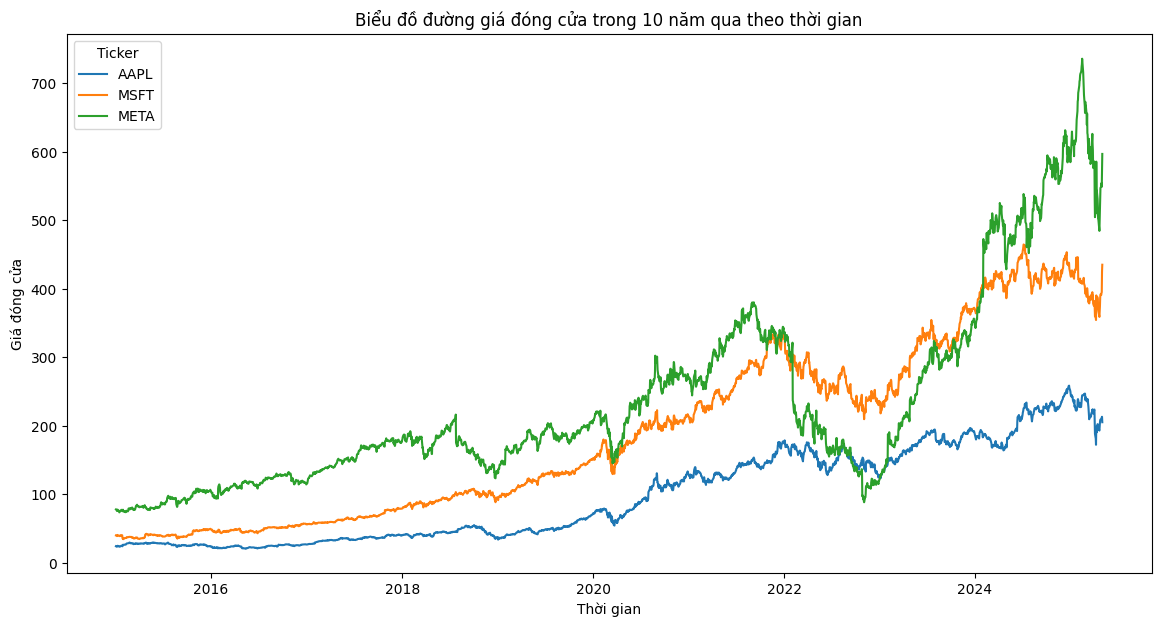

In [ ]:
#..ugu
plt.figure(figsize=(14, 7))
sns.lineplot(x='Date', y='Close', hue='Ticker', data=df_merge)
plt.title('Biểu đồ đường giá đóng cửa trong 10 năm qua theo thời gian')
plt.xlabel('Thời gian')
plt.ylabel('Giá đóng cửa')
plt.show()


###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


##**Lê A**
### **Question 2**:Biểu đồ cột khối lượng giao dịch theo năm 2015 - 2025

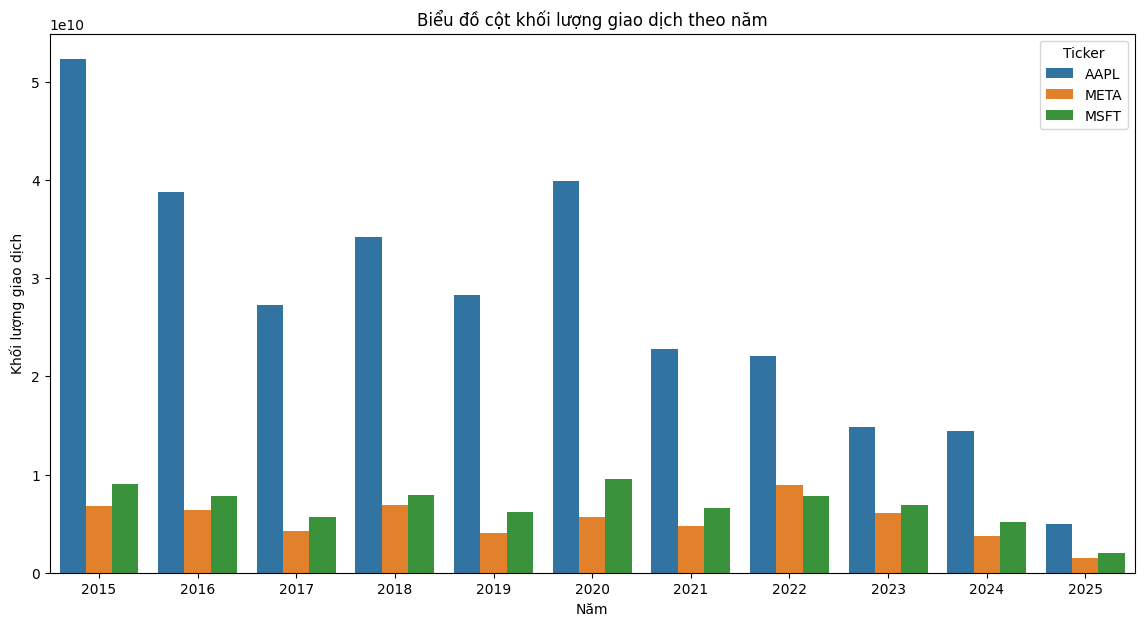

In [ ]:
yearly_volume = df_merge.groupby(['Year', 'Ticker'])['Volume'].sum().reset_index()

# Create the bar plot
plt.figure(figsize=(14, 7))
sns.barplot(x='Year', y='Volume', hue='Ticker', data=yearly_volume)
plt.title('Biểu đồ cột khối lượng giao dịch theo năm')
plt.xlabel('Năm')
plt.ylabel('Khối lượng giao dịch')
plt.show()


###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


##**Lê B**
### **Question 3**:Biểu đồ thể hiện khối lượng giao dịch theo từng tháng năm 2024

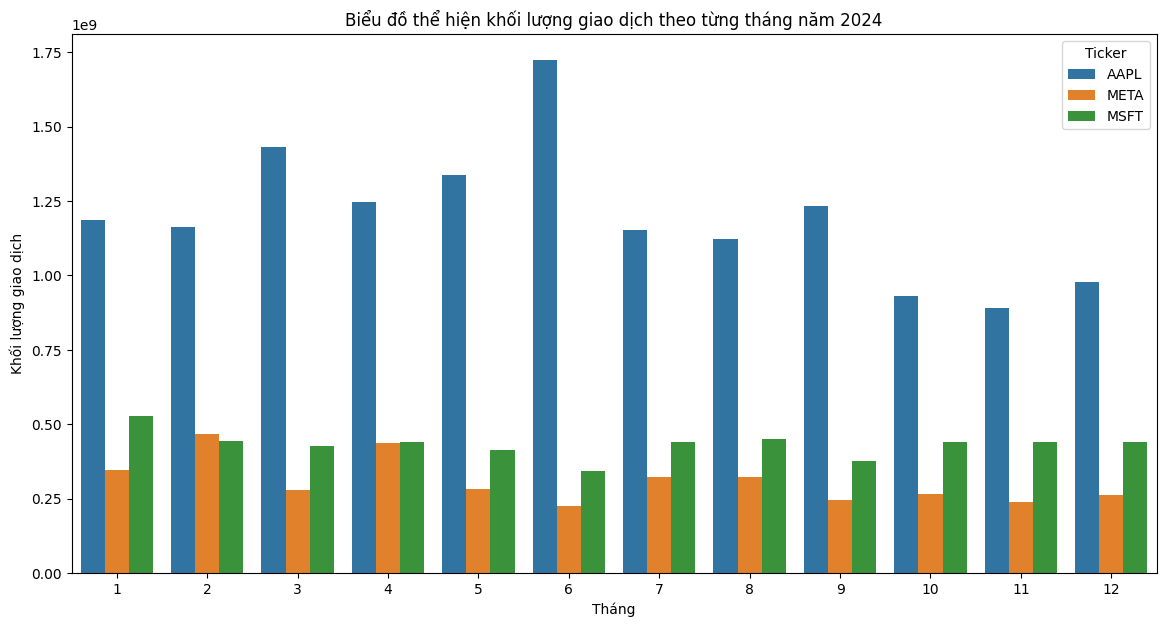

In [ ]:
df_2024 = df_merge[df_merge['Year'] == 2024]

monthly_volume_2024 = df_2024.groupby(['Month', 'Ticker'])['Volume'].sum().reset_index()

plt.figure(figsize=(14, 7))
sns.barplot(x='Month', y='Volume', hue='Ticker', data=monthly_volume_2024)
plt.title('Biểu đồ thể hiện khối lượng giao dịch theo từng tháng năm 2024')
plt.xlabel('Tháng')
plt.ylabel('Khối lượng giao dịch')
plt.show()


###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


##**Lê B**
### **Question 4**:Vẽ biểu đồ lợi nhuận hàng tháng năm 2024

<ipython-input-56-e6c02c9465d1>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2024['Return'] = df_2024.groupby('Ticker')['Close'].pct_change()


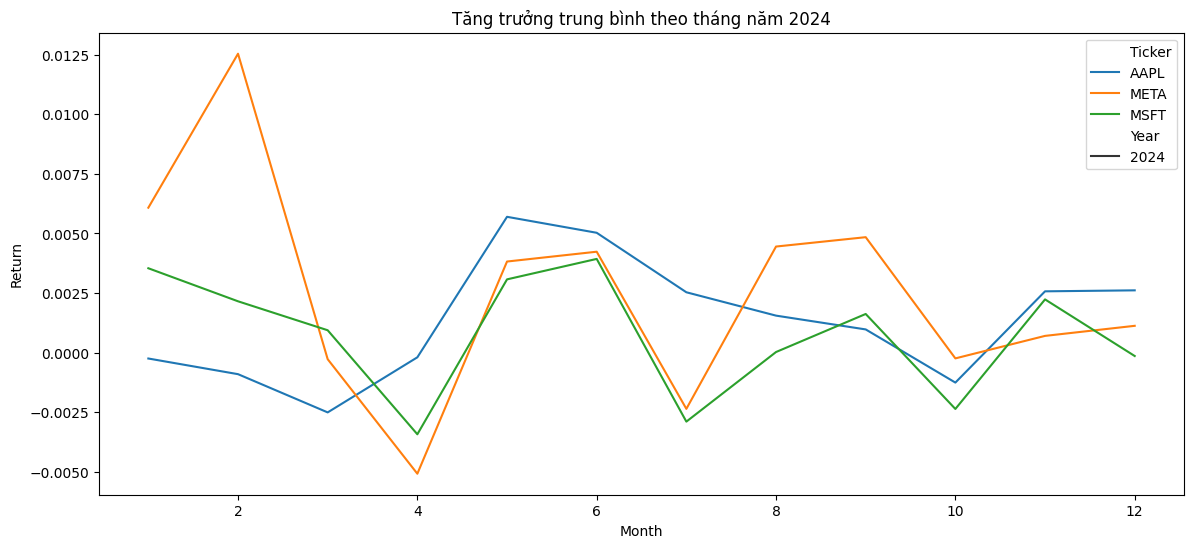

In [ ]:
df_2024 = df_merge[df_merge['Year'] == 2024]
df_2024['Return'] = df_2024.groupby('Ticker')['Close'].pct_change()
monthly_return = df_2024.groupby(['Year', 'Month', 'Ticker'])['Return'].mean().reset_index()

plt.figure(figsize=(14,6))
sns.lineplot(data=monthly_return, x='Month', y='Return', hue='Ticker', style='Year')
plt.title('Tăng trưởng trung bình theo tháng năm 2024')
plt.show()

###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


##**Lê C**
### **Question 5**:Vẽ biểu đồ thể hiện Số lượng chứng khoán bán theo quý (2015, 2020, 2024)

In [ ]:
df_merge['Date'] = pd.to_datetime(df_merge['Date'])

# Thêm cột Quý
df_merge['Quarter'] = df_merge['Date'].dt.quarter

In [ ]:
df_merge.head()

,Date,Close,High,Low,Open,Volume,Ticker,Year,Month,Day,Return,Quarter
0,2015-01-02,24.32,24.79,23.88,24.78,212818400,AAPL,2015,1,2,NaN,1
1,2015-01-05,23.64,24.17,23.45,24.09,257142000,AAPL,2015,1,5,-0.027961,1
2,2015-01-06,23.64,23.90,23.27,23.70,263188400,AAPL,2015,1,6,0.000000,1
3,2015-01-07,23.97,24.07,23.74,23.85,160423600,AAPL,2015,1,7,0.013959,1
4,2015-01-08,24.89,24.95,24.18,24.30,237458000,AAPL,2015,1,8,0.038381,1


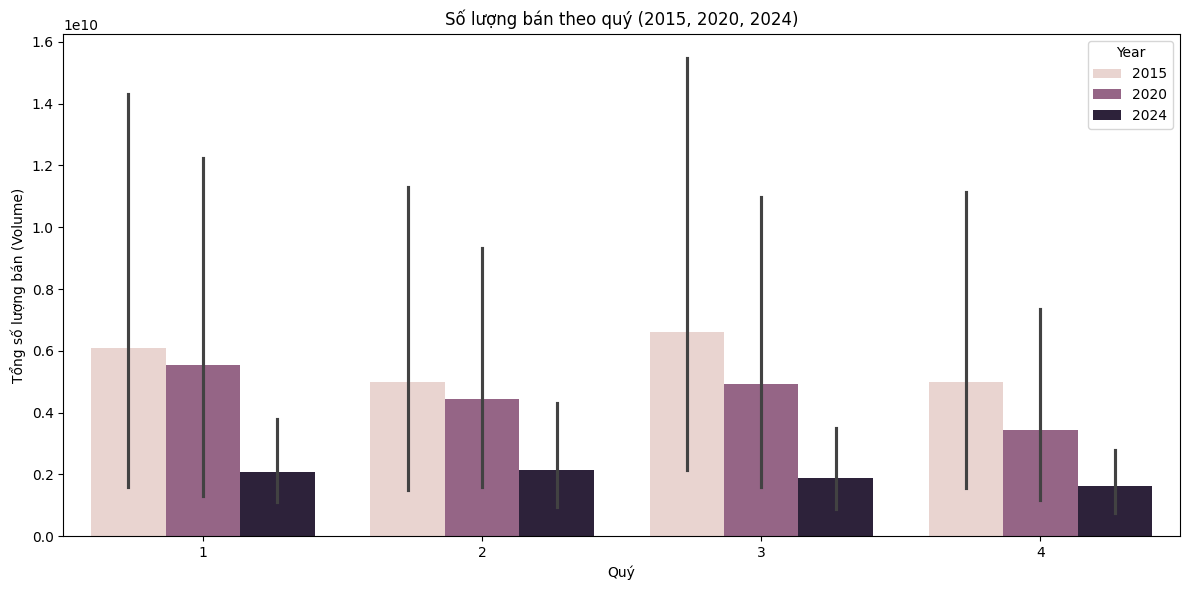

In [ ]:
df_filtered = df_merge[df_merge['Year'].isin([2015, 2020, 2024])]

volume_quarterly = df_filtered.groupby(['Year', 'Quarter', 'Ticker'])['Volume'].sum().reset_index()


plt.figure(figsize=(12,6))
sns.barplot(data=volume_quarterly, x='Quarter', y='Volume', hue='Year')
plt.title('Số lượng bán theo quý (2015, 2020, 2024)')
plt.xlabel('Quý')
plt.ylabel('Tổng số lượng bán (Volume)')
plt.tight_layout()
plt.show()


###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


##**Lê C**
### **Question 6**:Vẽ biểu đồ thể hiện Giá cao trung bình theo ngày trong tuần năm 2024

<ipython-input-67-3a38af4e4bac>:15: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x=high_by_day.index, y=high_by_day.values, palette='viridis')


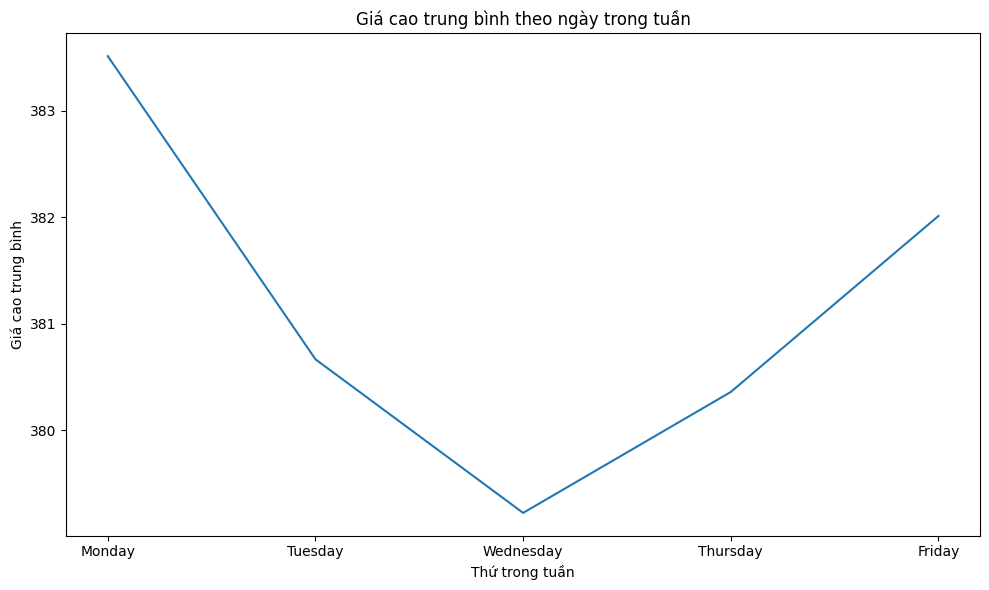

In [ ]:

df_merge['Date'] = pd.to_datetime(df_merge['Date'])

# Thêm cột thứ trong tuần (Monday=0, Sunday=6)
df_merge['DayOfWeek'] = df_merge['Date'].dt.day_name()

df_2024 = df_merge[df_merge['Year'] == 2024]
# Tính trung bình giá cao nhất theo ngày trong tuần
high_by_day = df_2024.groupby('DayOfWeek')['High'].mean().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'
])

# Vẽ biểu đồ
plt.figure(figsize=(10,6))
# Use sns.lineplot instead of sns.line
sns.lineplot(x=high_by_day.index, y=high_by_day.values, palette='viridis')
plt.title('Giá cao trung bình theo ngày trong tuần năm 2024')
plt.xlabel('Thứ trong tuần')
plt.ylabel('Giá cao trung bình')
plt.tight_layout()
plt.show()

###**Nhận xét:**
- Qua biểu đồ ta có thể thấy ...

- AAPL biến động ... giảm ... tăng ... giảm... tăng ...

- META biến động ... giảm ... tăng ... giảm... tăng ...

###**Lý do (Khuyến nghị)**
- Lý do cho sự biến đổi là do vào năm ... có vấn đề ... năm ... có ....


In [ ]:
%%shell
jupyter nbconvert --to html /content/ChucThiTot.ipynb

[NbConvertApp] Converting notebook /content/ChucThiTot.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 6 image(s).
[NbConvertApp] Writing 821098 bytes to /content/ChucThiTot.html
